<a href="https://colab.research.google.com/github/Hanso1lo/capstone_coursera/blob/master/PART_ABCD__assignment_DL_intro_week5_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peer-graded Assignment: Build a Regression Model in Keras



## Assignment Topic

In this project, you will build a regression model using the Keras library to model the same data about concrete compressive strength that we used in labs 3.



---


Concrete Data:

For your convenience, the data can be found here again: https://cocl.us/concrete_data. To recap, the predictors in the data of concrete strength include:

* Cement

* Blast Furnace Slag

* Fly Ash

* Water

* Superplasticizer

* Coarse Aggregate

* Fine Aggregate


 

---


Assignment Instructions:

Please check the My Submission tab for detailed assignment instructions.

How to submit:

You will need to submit your code for each part in a Jupyter Notebook. Since each part builds on the previous one, you can submit the same notebook four times for grading. Please make sure that you:

* use Markdown to clearly label your code for each part,

* properly comment your code so that your peer who is grading your work is able to understand your code easily,

* include your comments and discussion of the difference in the mean of the mean squared errors among the different parts.

--- 
TASKS

A. Build a baseline model (5 marks) 

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error  as the loss function.

---
Steps

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

Submit your Jupyter Notebook with your code and comments.

---

B. Normalize the data (5 marks) 

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

---

C. Increase the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

---

D. Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

## RESULTS


Measures            | PART A  | PART B  | PART C  | PART D
--------------------|---------|---------|---------|---
Normalized X        | no      |  yes    | yes     | yes
Epochs              | 50      |  50     | 100     | 50
Hidden Layers       |  1 x 10 | 1 x 10  | 1 x 10  | 3 x 10
Activation Function | ReLU    | ReLU    | ReLU    | ReLU
**Mean of MSE**     |**48.30**|**47.48**|**44.03**| **35.77**
**Standard Dev.**   |**3.99** |**3.46** |**3.63** | **6.08**


As can be seen in the chart above the mean of MSE became better (decreased) from Part A to Part D, while the Standard deviation increased for Part D.


## Import Libraries

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn. model_selection import train_test_split

## Load Data

In [7]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

## Analyse data

In [8]:
df.head() # Data overview

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info() # Check Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Check for missing values

In [ ]:
df.describe() # more info about the dataframe

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.isnull().sum() # Any missing values?

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Look at the correlation (just out of couriosity, it is not relevant for this particular exercise).
Looks like the strenght is mostly related to the amount of cement, the age and lots of water is rather bad (negatively correlated).

In [ ]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Lets plot someting with seaborn. Again, not necessary for the task at hand, but fun

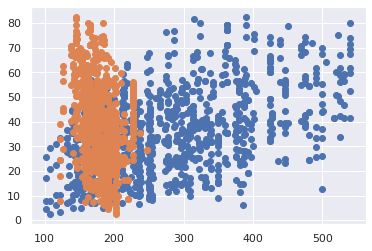

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # improves the look of matplotlib
sns.set() # set sns in order to take effect

a = df["Cement"]
b = df['Strength']
c = df['Water']

plt.scatter(a, b)
plt.scatter(c, b)


## Feature Selection

In [9]:
X = df. drop(['Strength'],axis=1). values # independant variable (features).
y = df['Strength']. values # dependant variable (target/aoutcome).

print(X)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]


## Normalize X
Normalize Data (input - independent variable).
Calculate the normalized version of X  (needed for part B of the project) 

In [10]:
X_norm = (X - X.mean()) / X.std() # This is relevant for Part B and forward of the assignment

## Train / Test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # For part A of the assignmet use X, for Part B and going forward X_norm  
print(X_train)

[[ 166.1    0.   163.3 ... 1058.6  780.1   28. ]
 [ 213.8   98.1   24.5 ... 1066.   785.5   14. ]
 [ 333.     0.     0.  ...  931.2  842.6    7. ]
 ...
 [ 190.3    0.   125.2 ... 1079.   798.9  100. ]
 [ 475.   118.8    0.  ...  852.1  781.5   28. ]
 [ 314.     0.   113.  ...  925.   783.    28. ]]


## Build the Neural Network
Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.

In [17]:
# count number of colums for X (needed for the next step)
n_cols = X.shape[1] # number of predictors
print(n_cols)

8


In [18]:
   # For Part A, B and C: One hidden layer of 10 nodes, and a ReLU activation function
   
   def regression_model():
       model = Sequential()
       model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
       # model.add(Dense(10, activation='relu'))
       # model.add(Dense(10, activation='relu'))
       model.add(Dense(1))
       # compile model
       model.compile(optimizer='adam', loss='mean_squared_error')
       return model

In [19]:
# build the model
model = regression_model()

## Train and Test
Next, we will train and test the model at the same time using the fit method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.

In [21]:
# fit the model and leave 30% of the data for testing. Run for 50 epochs
model.fit(X, y, validation_split=0.3, epochs=50, verbose=2, validation_data=(X_test, y_test))

Epoch 1/50
23/23 - 0s - loss: 147.6852 - val_loss: 99.3553 - 95ms/epoch - 4ms/step
Epoch 2/50
23/23 - 0s - loss: 146.7706 - val_loss: 97.0134 - 70ms/epoch - 3ms/step
Epoch 3/50
23/23 - 0s - loss: 145.3263 - val_loss: 95.0628 - 62ms/epoch - 3ms/step
Epoch 4/50
23/23 - 0s - loss: 144.6191 - val_loss: 94.5332 - 66ms/epoch - 3ms/step
Epoch 5/50
23/23 - 0s - loss: 143.1470 - val_loss: 92.6235 - 74ms/epoch - 3ms/step
Epoch 6/50
23/23 - 0s - loss: 142.7952 - val_loss: 91.6311 - 73ms/epoch - 3ms/step
Epoch 7/50
23/23 - 0s - loss: 141.7554 - val_loss: 90.9579 - 117ms/epoch - 5ms/step
Epoch 8/50
23/23 - 0s - loss: 140.5568 - val_loss: 89.1641 - 61ms/epoch - 3ms/step
Epoch 9/50
23/23 - 0s - loss: 139.5164 - val_loss: 88.5157 - 64ms/epoch - 3ms/step
Epoch 10/50
23/23 - 0s - loss: 139.1174 - val_loss: 87.1992 - 60ms/epoch - 3ms/step
Epoch 11/50
23/23 - 0s - loss: 138.0342 - val_loss: 86.5668 - 71ms/epoch - 3ms/step
Epoch 12/50
23/23 - 0s - loss: 137.5969 - val_loss: 86.4141 - 70ms/epoch - 3ms/step


In [22]:
print(model.summary())
model.evaluate(X, y)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
33/33 [==============================] - 0s 1ms/step - loss: 111.5372


111.53718566894531

## Evaluate the model

### Evaluate on the test data

In [23]:
# the loss is mean squared error as it was defined in the model building. Further down we also calculate means squared error with a function from scikit learn. Result should be the same 
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

10/10 [==============================] - 0s 2ms/step - loss: 1537.9808


1537.9808349609375

### Evaluate vs actual 
Next we need to compute the mean squared error between the predicted concrete strength and the actual concrete strength.

Let's import the mean_squared_error function from Scikit-learn.

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

1537.9808619670162 0.0


## PART A of Assignement

Create a list of 50 mean squared errors and report mean and the standard deviation of the mean squared errors.

In [ ]:
# use X or X-norm  ------
input = X # input = X-norm for Part B and forward
# -----------------------

total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

# change between normalized and non-normalized data in 'mean squared errors with ..depending on input = X or X_norm' "
print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with non-normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 46.63036346435547
MSE 2: 55.60920333862305
MSE 3: 45.19363021850586
MSE 4: 50.281097412109375
MSE 5: 55.39271545410156
MSE 6: 54.37984848022461
MSE 7: 58.54063034057617
MSE 8: 48.6876220703125
MSE 9: 51.495086669921875
MSE 10: 49.96992492675781
MSE 11: 47.779273986816406
MSE 12: 46.765201568603516
MSE 13: 58.14826202392578
MSE 14: 52.361122131347656
MSE 15: 49.72740936279297
MSE 16: 42.47349548339844
MSE 17: 52.022281646728516
MSE 18: 50.22898483276367
MSE 19: 44.581050872802734
MSE 20: 47.08901596069336
MSE 21: 45.46519470214844
MSE 22: 44.1303596496582
MSE 23: 42.12464904785156
MSE 24: 45.83871078491211
MSE 25: 46.6060676574707
MSE 26: 47.38974380493164
MSE 27: 50.959285736083984
MSE 28: 45.96501922607422
MSE 29: 51.88426208496094
MSE 30: 50.30123519897461
MSE 31: 50.81800842285156
MSE 32: 41.69404220581055
MSE 33: 46.895416259765625
MSE 34: 48.22885513305664
MSE 35: 45.760372161865234
MSE 36: 49.39558792114258
MSE 37: 52.99365234375
MSE 38: 50.48936080932617
MSE 39: 44.162113

## PART B of Assignement

In [ ]:
# use X or X-norm  ------
input = X_norm # input = X-norm for Part B and forward
# -----------------------

total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

# change between normalized and non-normalized data in 'mean squared errors with ..depending on input = X or X_norm' "
print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 45.30276107788086
MSE 2: 54.15941619873047
MSE 3: 45.6934700012207
MSE 4: 48.48611831665039
MSE 5: 46.98233413696289
MSE 6: 50.979087829589844
MSE 7: 53.79774856567383
MSE 8: 45.9792366027832
MSE 9: 46.701805114746094
MSE 10: 51.13235092163086
MSE 11: 47.97605514526367
MSE 12: 42.77960205078125
MSE 13: 54.505409240722656
MSE 14: 50.53525924682617
MSE 15: 47.1468391418457
MSE 16: 42.20564270019531
MSE 17: 46.91715621948242
MSE 18: 48.8132209777832
MSE 19: 40.638404846191406
MSE 20: 46.89804458618164
MSE 21: 42.84587478637695
MSE 22: 42.248085021972656
MSE 23: 42.447303771972656
MSE 24: 44.699459075927734
MSE 25: 46.237342834472656
MSE 26: 45.533451080322266
MSE 27: 46.62476348876953
MSE 28: 45.753089904785156
MSE 29: 50.7520866394043
MSE 30: 47.695804595947266
MSE 31: 45.175384521484375
MSE 32: 43.130653381347656
MSE 33: 44.99952697753906
MSE 34: 49.28125762939453
MSE 35: 46.045040130615234
MSE 36: 52.166603088378906
MSE 37: 50.021175384521484
MSE 38: 51.894683837890625
MSE 39: 4

## PART C of Assignment

In [ ]:
# use X or X-norm  ------
input = X_norm # input = X-norm for Part B and forward
# -----------------------

total_mean_squared_errors = 100
epochs = 100
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

# change between normalized and non-normalized data in 'mean squared errors with ..depending on input = X or X_norm' "
print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 44.42921829223633
MSE 2: 53.17881393432617
MSE 3: 44.06444549560547
MSE 4: 47.00339889526367
MSE 5: 46.037357330322266
MSE 6: 50.8060417175293
MSE 7: 53.73298263549805
MSE 8: 45.766387939453125
MSE 9: 45.92265701293945
MSE 10: 51.19281768798828
MSE 11: 47.105560302734375
MSE 12: 42.11293029785156
MSE 13: 53.56943893432617
MSE 14: 49.842864990234375
MSE 15: 46.06721115112305
MSE 16: 41.067352294921875
MSE 17: 45.71429443359375
MSE 18: 47.60752487182617
MSE 19: 39.03409957885742
MSE 20: 45.59123992919922
MSE 21: 40.40010070800781
MSE 22: 40.67131423950195
MSE 23: 40.04538345336914
MSE 24: 42.46395492553711
MSE 25: 44.09761428833008
MSE 26: 43.276065826416016
MSE 27: 44.2633171081543
MSE 28: 42.23894500732422
MSE 29: 48.03921890258789
MSE 30: 45.52577590942383
MSE 31: 44.339080810546875
MSE 32: 40.52536392211914
MSE 33: 42.98743438720703
MSE 34: 46.22614669799805
MSE 35: 43.52667236328125
MSE 36: 49.97806167602539
MSE 37: 44.5407829284668
MSE 38: 47.810943603515625
MSE 39: 44.02744

## PART D of Assignment

In [4]:
   # For Part D: Three hidden layer of 10 nodes, and a ReLU activation function
   
   def regression_model():
       model_d = Sequential()
       model_d.add(Dense(10, activation='relu', input_shape=(n_cols,)))
       model_d.add(Dense(10, activation='relu'))
       model_d.add(Dense(10, activation='relu'))
       model_d.add(Dense(1))
       # compile model
       model_d.compile(optimizer='adam', loss='mean_squared_error')
       return model_d

In [13]:
# build the model
model_d = regression_model()

In [26]:
# use X or X-norm  ------
input = X_norm # input = X-norm for Part B and forward
# -----------------------

total_mean_squared_errors = 100
epochs = 100
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.3, random_state=i)
    model_d.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model_d.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model_d.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

# change between normalized and non-normalized data in 'mean squared errors with ..depending on input = X or X_norm' "
print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 53.278770446777344
MSE 2: 59.73622512817383
MSE 3: 43.44036102294922
MSE 4: 47.18175506591797
MSE 5: 44.06436538696289
MSE 6: 47.24593734741211
MSE 7: 48.943626403808594
MSE 8: 42.967376708984375
MSE 9: 43.28153610229492
MSE 10: 45.018768310546875
MSE 11: 44.09657669067383
MSE 12: 40.4283561706543
MSE 13: 49.26630401611328
MSE 14: 46.58526611328125
MSE 15: 41.28058624267578
MSE 16: 34.570274353027344
MSE 17: 37.66974639892578
MSE 18: 42.242271423339844
MSE 19: 36.673179626464844
MSE 20: 40.54566192626953
MSE 21: 39.70600509643555
MSE 22: 38.36491775512695
MSE 23: 33.97776794433594
MSE 24: 35.85478591918945
MSE 25: 38.57972717285156
MSE 26: 37.149436950683594
MSE 27: 38.84543228149414
MSE 28: 34.60663986206055
MSE 29: 41.72658920288086
MSE 30: 36.936317443847656
MSE 31: 37.497188568115234
MSE 32: 35.57341384887695
MSE 33: 35.04322814941406
MSE 34: 37.25686264038086
MSE 35: 38.10411071777344
MSE 36: 42.401729583740234
MSE 37: 39.3030891418457
MSE 38: 38.53602981567383
MSE 39: 35.9